f(x,y) = (1.5 – x -xy)^2 + (2.25 – x + xy^2)^2 + (2.625 – x + xy^3)^2 for x,y in range <-4.5, 4.5>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



In [2]:
def f(x):
    """for x,y in range <-4.5,4.5>"""
    return (1.5 - x[0] - x[0] * x[1])**2 + (2.25 - x[0] + (x[0] * x[1])**2)**2 + (2.625 - x[0] + (x[0] * x[1])**3)**2



In [3]:
f((4,4))

16830939.203125

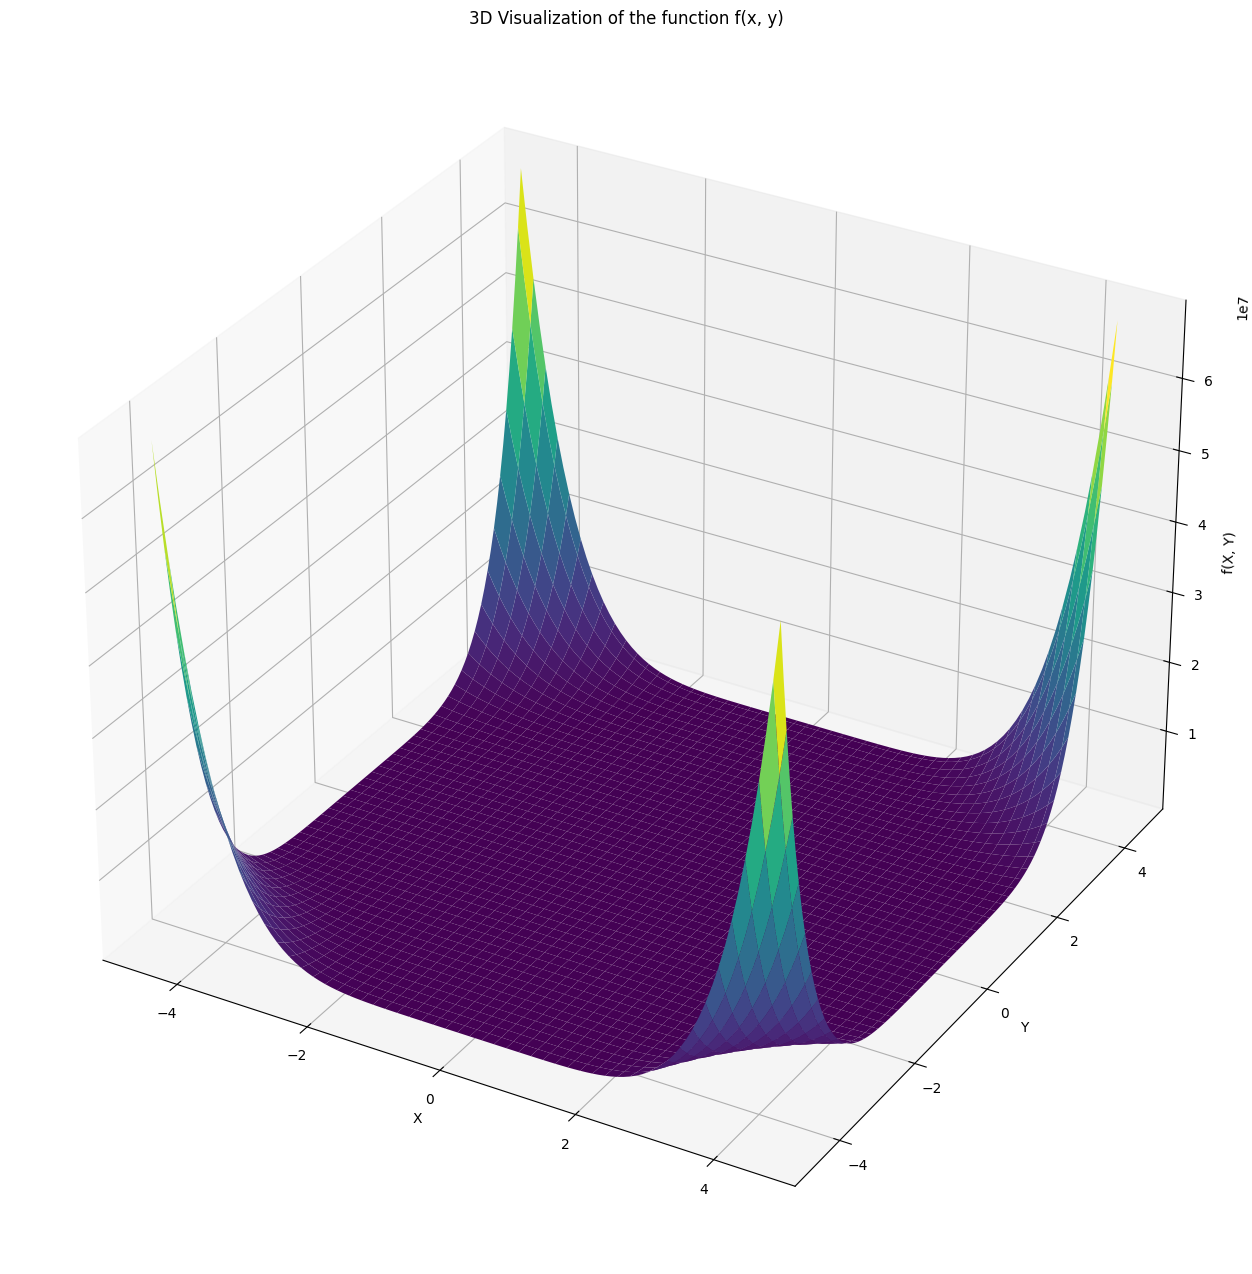

In [4]:
# Define the range for x and y values
x = np.linspace(-4.5, 4.5, 100)
y = np.linspace(-4.5, 4.5, 100)
X, Y = np.meshgrid(x, y)

Z = f((X,Y))
# Plotting the 3D surface
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Label the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_title('3D Visualization of the function f(x, y)')

plt.show()

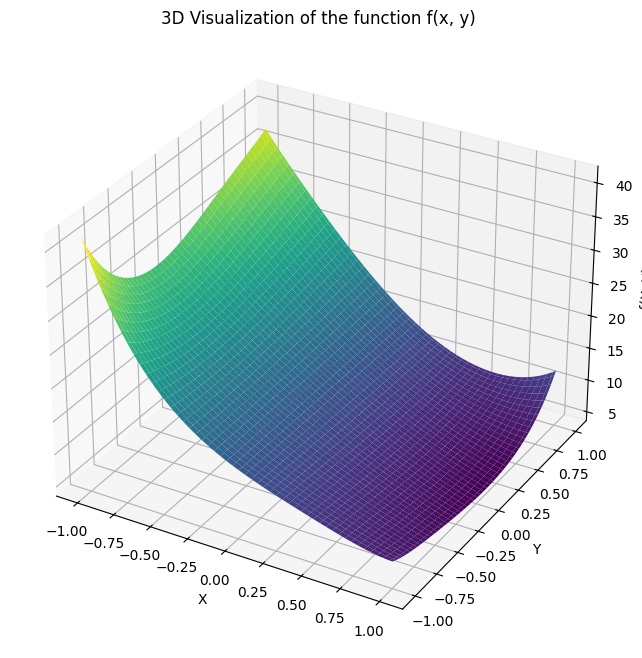

In [5]:
# Define the range for x and y values
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)

Z = f((X,Y))

# Plotting the 3D surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Label the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_title('3D Visualization of the function f(x, y)')

plt.show()

Value of the function explodes especially on the ends of range <-4.5,4.5>

In [194]:
particles = 200
dim = 2
c = 2.05  # as in original paper
steps =20
up_domain = 4.5              # representation of function domain
low_domain = -4.5

Pack to function 

In [ ]:
# Defining a Standard for Particle Swarm Optimization Daniel Bratton James Kennedy 2007 
def pso_optimizer(function = f , particles = 50 , steps = 20 , c = 2.05 , chi = 0.72984, low_domain = low_domain, up_domain = up_domain , dim = 2):
    X  = np.random.uniform(low = low_domain , high= up_domain , size=(particles,dim))  # initialize positions of each particle in search space
    P = X.copy()   # for now it's just init postion
    V = np.random.random(size = (particles,dim))                    # let's just init as rand from range (0,1)
    # I should have access to both value and args
    F_P = np.apply_along_axis(function,axis=1,arr=X)  # calcualte funciton value for every x1, x2 at this step and compare with previous 

    P_I = F_P      # at first step it's just that in next we need to compare

    p_g = P_I.argmin()        # at first step it's just that cuz we can't compare with anything 

    epsilon = np.random.random(size=(dim,2))
    
    for _ in range(steps):
        # update V  as ub Bratton, D., & Kennedy, J. (2007). Defining a Standard for Particle Swarm Optimization. 2007 IEEE Swarm Intelligence Symposium. doi:10.1109/sis.2007.368035 
        iterator = np.nditer(V,flags=['multi_index'])    
        for v in iterator:
            i = iterator.multi_index[0]   # as I'm used to in matrix 
            j = iterator.multi_index[1]
            V[(i,j)] = chi*(v + c * (P[(i,j)]- X[(i,j)]) * epsilon[j][0] + c * epsilon[j][1] * (P[p_g][j] - X[(i,j)]))  # I'm just impressed how this chi stabilize this algo
        X = X + V    
                
        F_P = np.apply_along_axis(function,axis=1,arr=X)  # calcualte funciton value for every x1, x2 at this step and compare with previous 

        P_I = np.minimum(F_P, P_I)     # at first step it's just that in next we need to compare  # if P_I < F_P swap 

        p_g = P_I.argmin()        # at first step it's just that cuz we can't compare with anything 
        values = np.column_stack((F_P,P_I))   # 1 column old best, 0 new values 
        which_lower = values.argmin(axis=1)
        # update table of arguments 

        for i in range(len(which_lower)):
            if which_lower[i] == 0:   # if new is better replace arguments 
                P[i] = X[i]    # otherwise not 
        epsilon = np.random.random(size=(dim,2))
        
        print(f"Step: {_} best value: {P_I.min()} , this step min: {F_P.min()}")
    
    # return arguments, min 
    return  P[p_g] , P_I.min()
    

In [195]:
pso_optimizer(function=f,particles=particles,steps=steps,c=c,low_domain=low_domain,up_domain=up_domain,dim=dim)

Step: 0 best value: 0.19377348835340424 , this step min: 0.19377348835340424
Step: 1 best value: 0.19377348835340424 , this step min: 0.7054315353708006
Step: 2 best value: 0.19377348835340424 , this step min: 0.26253008267345757
Step: 3 best value: 0.19377348835340424 , this step min: 0.5312903727619618
Step: 4 best value: 0.19377348835340424 , this step min: 0.3522227580569144
Step: 5 best value: 0.17170021453808226 , this step min: 0.17170021453808226
Step: 6 best value: 0.17170021453808226 , this step min: 0.27023457258066336
Step: 7 best value: 0.14993237814758686 , this step min: 0.14993237814758686
Step: 8 best value: 0.14993237814758686 , this step min: 0.16689455225798927
Step: 9 best value: 0.14633470070679536 , this step min: 0.14633470070679536
Step: 10 best value: 0.14633470070679536 , this step min: 0.16895989517485713
Step: 11 best value: 0.1388880795112684 , this step min: 0.1388880795112684
Step: 12 best value: 0.13872216909722765 , this step min: 0.13872216909722765
S

(array([ 2.36774453, -0.25301756]), 0.13211987704734313)

In [ ]:
# Defining a Standard for Particle Swarm Optimization Daniel Bratton James Kennedy 2007 
def pso_optimizer_withmistake(function = f , particles = 50 , steps = 20 , c = 2.05 , chi = 0.72984, low_domain = low_domain, up_domain = up_domain , dim = 2):
    X  = np.random.uniform(low = low_domain , high= up_domain , size=(particles,dim))  # initialize positions of each particle in search space
    P = X.copy()   # for now it's just init postion
    V = np.random.random(size = (particles,dim))            5        # let's just init as rand from range (0,1)
    # I should have access to both value and args
    F_P = np.apply_along_axis(function,axis=1,arr=X)  # calcualte funciton value for every x1, x2 at this step and compare with previous 

    P_I = F_P      # at first step it's just that in next we need to compare

    p_g = P_I.argmin()        # at first step it's just that cuz we can't compare with anything 

    epsilon = np.random.random(size=(dim,2))
    
    for _ in range(steps):
        # update V  as ub Bratton, D., & Kennedy, J. (2007). Defining a Standard for Particle Swarm Optimization. 2007 IEEE Swarm Intelligence Symposium. doi:10.1109/sis.2007.368035 
        iterator = np.nditer(V,flags=['multi_index'])    
        for v in iterator:
            i = iterator.multi_index[0]   # as I'm used to in matrix 
            j = iterator.multi_index[1]
            V[(i,j)] = v + c * (P[(i,j)]- X[(i,j)]) * epsilon[j][0] + c * epsilon[j][1] * (P[p_g][j] - X[(i,j)])  # I'm just impressed how this chi stabilize this algo, here example of lacking this
            # here according to papers I have a small mistake because without this constant I should cap V to some level and I ommit this on puprose
        X = X + V    
                
        F_P = np.apply_along_axis(function,axis=1,arr=X)  # calcualte funciton value for every x1, x2 at this step and compare with previous 

        P_I = np.minimum(F_P, P_I)     # at first step it's just that in next we need to compare  # if P_I < F_P swap 

        p_g = P_I.argmin()        # at first step it's just that cuz we can't compare with anything 
        values = np.column_stack((F_P,P_I))   # 1 column old best, 0 new values 
        which_lower = values.argmin(axis=1)
        # update table of arguments 

        for i in range(len(which_lower)):
            if which_lower[i] == 0:   # if new is better replace arguments 
                P[i] = X[i]    # otherwise not 
        epsilon = np.random.random(size=(dim,2))
        
        print(f"Step: {_} best value: {P_I.min()} , this step min: {F_P.min()}")
    
    # return arguments, min 
    return  P[p_g] , P_I.min()

In [ ]:
pso_optimizer_withmistake(function=f,particles=particles,steps=steps,c=c,low_domain=low_domain,up_domain=up_domain,dim=dim)  # it found minimum but it's not stable

Step: 0 best value: 0.4535174032396989 , this step min: 0.9707381379466882
Step: 1 best value: 0.2080244609202604 , this step min: 0.2080244609202604
Step: 2 best value: 0.2080244609202604 , this step min: 0.9576741547169423
Step: 3 best value: 0.14716341351585638 , this step min: 0.14716341351585638
Step: 4 best value: 0.13251200487068965 , this step min: 0.13251200487068965
Step: 5 best value: 0.13251200487068965 , this step min: 0.20230966724948182
Step: 6 best value: 0.13251200487068965 , this step min: 2.201851211405166
Step: 7 best value: 0.13251200487068965 , this step min: 0.4380122989043359
Step: 8 best value: 0.13251200487068965 , this step min: 3.8120168806988577
Step: 9 best value: 0.13251200487068965 , this step min: 3.8773295753108883
Step: 10 best value: 0.13251200487068965 , this step min: 0.9904043683219568
Step: 11 best value: 0.13251200487068965 , this step min: 6.201972792094546
Step: 12 best value: 0.13251200487068965 , this step min: 0.912001126770023
Step: 13 bes

(array([ 2.36127687, -0.25295912]), 0.13251200487068965)